In [1]:
!nvidia-smi

Sun Jan 22 04:35:39 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P0    26W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Evaluate CNN Balanced model on test data

In [2]:
from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
drive.mount('/content/gdrive')
!ls
%cd gdrive/My\ Drive/phd-thesis/
!ls

Mounted at /content/gdrive
gdrive	sample_data
/content/gdrive/My Drive/phd-thesis
 adasyn_TL_MajorVoting_balance.ipynb
 ADASYN_TL_MajorVoting_imb.ipynb
 adasyn_xgboost_20_imb.ipynb
 adasyn_xgboost_20.ipynb
 adasyn_xgboost_fulldata_balance.ipynb
 adasyn_xgboost_fulldata_imb.ipynb
 Attack_Types.csv
'bagging&ensemble.py'
 cnn.docx
 cnn.ipynb
 CNN-test-data
 CNN-test-data-balanced
 CNN-test-data-balanced-dropout
 CNN-test-data-imb
 createCNN_Balanced_fulldata.ipynb
 createCNN_Balanced.ipynb
 createNetwork-211025.py
 createNetwork-CNN-imb.ipynb
'createNetwork-testdata (1).ipynb'
 createNetwork-testdata.ipynb
 createNetwork-testdata.py
 ensemble_balance-old.ipynb
 ensemble_imb-old.ipynb
 Evaluate_adasyn_xgboost_fulldata_balance.ipynb
 Evaluate_adasyn_xgboost_fulldata_imb.ipynb
 Evaluate_adasyn_xgboost_model_20.ipynb
 evaluate_auc_3Algorithm_macro.ipynb
 evaluate_auc_3Algorithm_micro.ipynb
 Evaluate_CNN_Balacanced.ipynb
 Evaluate_CNN_imb.ipynb
 Evaluate_PR_3Algorithms.ipynb
 Evaluate_PR_CNN.i

x_test         0         1         2    3         4         5         6         7    \
0 -0.110249 -0.007762 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
1 -0.110249 -0.007762 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
2 -0.109481 -0.005551 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
3 -0.110249 -0.007759 -0.004919    0 -0.089486 -0.007736 -0.095076 -0.027023   
4 -0.109865 -0.007762 -0.004915    0 -0.089486 -0.007736 -0.095076 -0.027023   

   8         9    ...  105  106  107  108  109  110  111  112  113  114  
0    0 -0.011664  ...    0    0    0    1    0    0    0    0    0    0  
1    0 -0.011664  ...    0    0    0    1    0    0    0    0    0    0  
2    0 -0.011664  ...    0    0    0    0    0    0    0    0    0    0  
3    0 -0.011664  ...    0    0    0    0    0    0    0    0    0    0  
4    0 -0.011664  ...    0    0    0    0    1    0    0    0    0    0  

[5 rows x 115 columns]
y_test    0
0  1
1  1
2  0
3  2
4  2
705/705

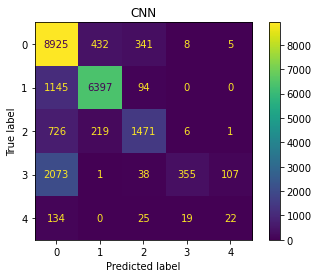

In [3]:
# evaluation on some metrics
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score, \
    classification_report, roc_auc_score, roc_curve, auc, plot_confusion_matrix, ConfusionMatrixDisplay
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
import sys

from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import numpy as np
import pandas as pd


model = tf.keras.models.load_model('CNN-test-data-balanced')
#model = tf.keras.models.load_model('CNN-test-data-balanced-dropout') #dropout
class_names = ['benign 0', 'dos 1', 'probe 2', 'r2l 3', 'u2r 4']
class_names_num = ['0', '1', '2', '3', '4']

x_test = pd.read_csv('KDDTest_x.csv',header=None)
y_test = pd.read_csv('KDDTest_y.csv',header=None)
x_test.drop(x_test.columns[[115,116,117]], axis=1, inplace=True)
y_test[0]=list(y_test[0].map({'benign':0, 'dos':1, 'probe':2, 'r2l':3, 'u2r':4}))

print("x_test", x_test.head())
print("y_test", y_test.head())
y_test = y_test.values.ravel()

predictions = model.predict(x_test)
print("predictions shape:", predictions.shape)
print(predictions)

# Generate arg maxes for predictions
classes = np.argmax(predictions, axis = 1)
print("classes:", classes)
#y_test = y_test.values.ravel()
results = confusion_matrix(y_test, classes)   #Y_res
error = zero_one_loss(y_test, classes)   #Y_res

print("result: \n" , results)
print("error:", error)
print("validation:", accuracy_score(y_test, classes))
#sys.exit(0)

#rac = roc_auc_score(y_test, classes, multi_class='ovr', average ='macro')  #Y_res
#print("ROC AUC Score:", rac)
print(classification_report(y_test, classes, target_names=class_names))   #Y_res
print(classification_report_imbalanced(y_test, classes, digits=4, target_names=class_names))  #Y_res
print(f"The geometric mean is {geometric_mean_score(y_test, classes):.3f}") #Y_res

#y_test = y_test.values.ravel()
#cm = confusion_matrix(y_test, classes, labels=class_names_num)
cm = confusion_matrix(y_test, classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names_num)
disp.plot()
_ = disp.ax_.set_title("CNN")
plt.show()

In [4]:
rac = roc_auc_score(y_test, predictions, multi_class='ovr', average ='macro')  #Y_res
print("ROC AUC Score:", rac)

ROC AUC Score: 0.8815503476855913


y: [[0 1 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 ...
 [0 1 0 0 0]
 [1 0 0 0 0]
 [0 0 1 0 0]]
n_classes: 5


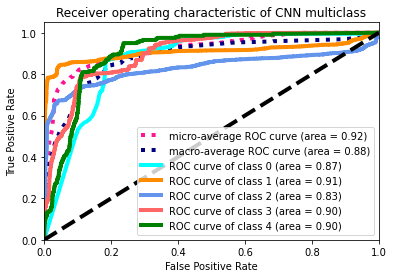

One-vs-One ROC AUC scores:
0.859122 (macro),
0.873344 (weighted by prevalence)(micro)
One-vs-Rest ROC AUC scores:
0.881550 (macro),
0.881435 (weighted by prevalence),
0.918097(micro)


In [5]:
# plot roc curve
from itertools import cycle
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
y = label_binarize(y_test, classes=[0, 1, 2, 3, 4])  #Y_res
n_classes = y.shape[1]
yy = predictions

print("y:", y)
print("n_classes:", n_classes)

lw = 4

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    # fpr[i], tpr[i], _ = roc_curve(Y_res[:, i], y[:, i])
    # fpr[i], tpr[i], threshold = roc_curve(y[:, i], yy[:, i], pos_label=0)
    fpr[i], tpr[i], threshold = roc_curve(y[:, i], yy[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), yy.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)


plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)



colors = cycle(["aqua", "darkorange", "cornflowerblue", "#FF6666", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic of CNN multiclass")
plt.legend(loc="lower right")
plt.show()


# compute roc_auc_score
# y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, yy, multi_class="ovo", average="macro")  #Y_res
weighted_roc_auc_ovo = roc_auc_score(
    y_test, yy, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, yy, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, yy, multi_class="ovr", average="weighted"
) #Y_res
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)"
    "(micro)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo, roc_auc["micro"])  #leon
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence),\n{:.6f}"   #leon
    "(micro)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr, roc_auc["micro"])  #leon
    #"(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)